In [39]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [62]:
df=pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [63]:
data = df[['Annual Income (k$)',"Spending Score (1-100)"]]

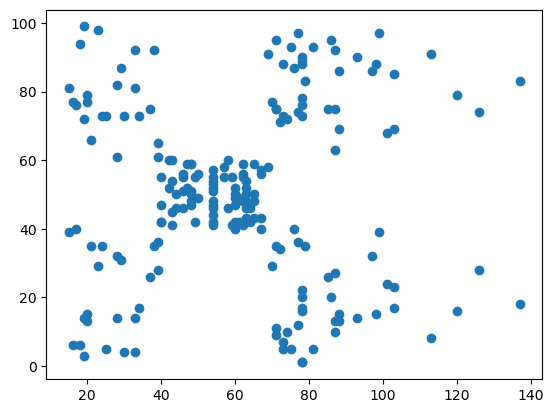

In [64]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])

In [65]:
scaler = MinMaxScaler()
scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)'] = scaler.transform(df[['Annual Income (k$)']])
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,0.000000,39
1,2,Male,21,0.000000,81
2,3,Female,20,0.008197,6
3,4,Female,23,0.008197,77
4,5,Female,31,0.016393,40
...,...,...,...,...,...
195,196,Female,35,0.860656,79
196,197,Female,45,0.909836,28
197,198,Male,32,0.909836,74
198,199,Male,32,1.000000,18


In [66]:
scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)'] = scaler.transform(df[['Spending Score (1-100)']])
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,0.000000,0.387755
1,2,Male,21,0.000000,0.816327
2,3,Female,20,0.008197,0.051020
3,4,Female,23,0.008197,0.775510
4,5,Female,31,0.016393,0.397959
...,...,...,...,...,...
195,196,Female,35,0.860656,0.795918
196,197,Female,45,0.909836,0.275510
197,198,Male,32,0.909836,0.744898
198,199,Male,32,1.000000,0.173469


In [67]:
km= KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [68]:
y_pred = km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [69]:
df['cluster'] = y_pred

In [70]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,0.000000,0.387755,0
1,2,Male,21,0.000000,0.816327,0
2,3,Female,20,0.008197,0.051020,1
3,4,Female,23,0.008197,0.775510,0
4,5,Female,31,0.016393,0.397959,0


In [74]:
km.cluster_centers_

array([[0.25631369, 0.5426549 ],
       [0.46737705, 0.1577551 ],
       [0.58638083, 0.82783883]])

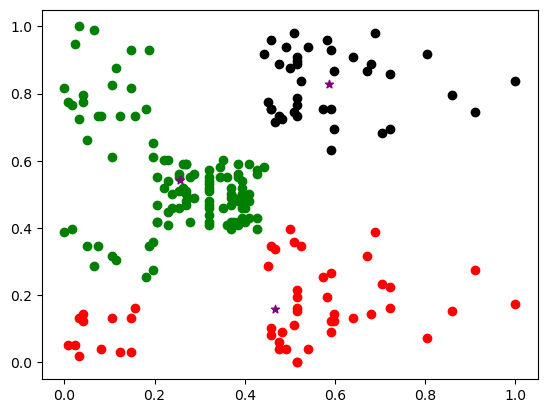

In [75]:
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]

plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color = "green")
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color = "red")
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color = "black")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color ="purple",marker ="*",label = "centroid")

In [86]:
#Checking out the elbow graph also to get the optimal k value
wcss=[]
k_rng = range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    wcss.append(km.inertia_)

In [87]:
wcss

[23.04072032603991,
 13.993505283127973,
 9.058985215159453,
 6.110312266413656,
 3.5831179059525606,
 3.1088367124666965,
 2.6260623772655114,
 2.3654653330451083,
 1.8758335247729212]

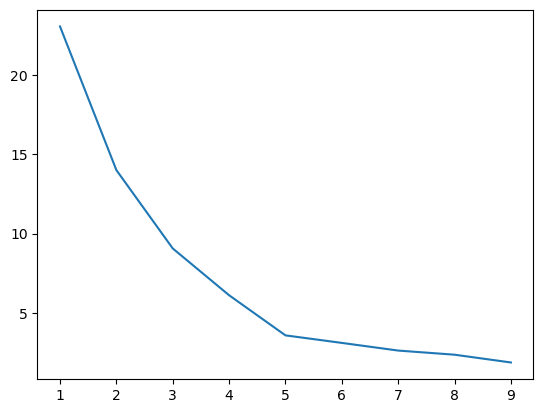

In [88]:
plt.plot(k_rng,wcss)

### It seems k=5 to be the optimal value 

In [89]:
km=KMeans(n_clusters=5)
km

KMeans(n_clusters=5)

In [90]:
km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
y_pred = km.predict(df[['Annual Income (k$)','Spending Score (1-100)']])
y_pred

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 3,
       1, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2,
       3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [92]:
df.drop("cluster",axis=1,inplace=True)

In [95]:
df['cluster'] = y_pred
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,0.000000,0.387755,1
1,2,Male,21,0.000000,0.816327,4
2,3,Female,20,0.008197,0.051020,1
3,4,Female,23,0.008197,0.775510,4
4,5,Female,31,0.016393,0.397959,1


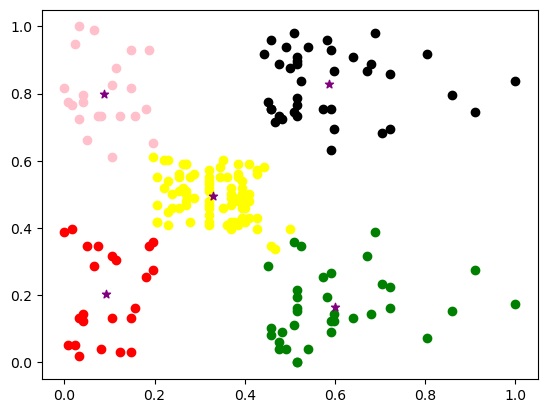

In [96]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]

plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color = "green")
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color = "red")
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color = "black")
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color = "yellow")
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color = "pink")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color ="purple",marker ="*",label = "centroid")

# Task 2

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


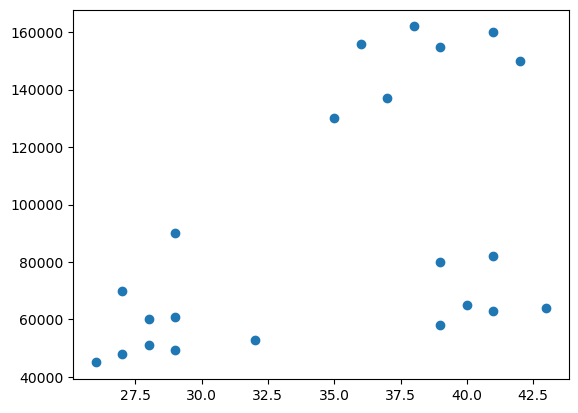

In [7]:
plt.scatter(df['Age'],df['Income($)'])

In [8]:
#kmeans object
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [10]:
y_predicted = km.fit_predict(df[["Age","Income($)"]])
y_predicted

C:\Users\Prince\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Prince\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [13]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


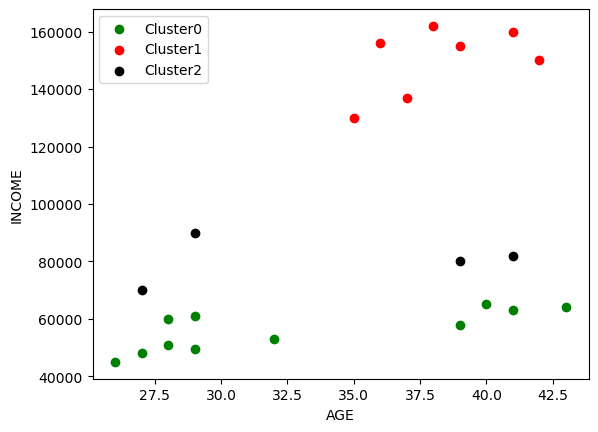

In [21]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color = "green",label = "Cluster0")
plt.scatter(df2.Age,df2['Income($)'],color = "red",label = "Cluster1")
plt.scatter(df3.Age,df3['Income($)'],color = "black",label = "Cluster2")

plt.xlabel("AGE")
plt.ylabel("INCOME")
plt.legend()

In [23]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [25]:
scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [26]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[["Age","Income($)"]])
y_predicted

C:\Users\Prince\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Prince\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [28]:
df.cluster = y_predicted

In [29]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


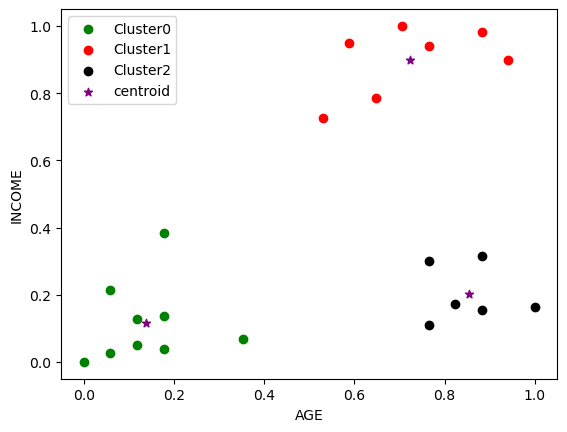

In [33]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color = "green",label = "Cluster0")
plt.scatter(df2.Age,df2['Income($)'],color = "red",label = "Cluster1")
plt.scatter(df3.Age,df3['Income($)'],color = "black",label = "Cluster2")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker = "*",label = "centroid")
plt.xlabel("AGE")
plt.ylabel("INCOME")
plt.legend()

In [32]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [40]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k,n_init=10)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [41]:
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.2621792762345213,
 0.21055478995472496,
 0.16869711728567788,
 0.14087951725103115,
 0.1038375258660356]

Text(0, 0.5, 'wcss')

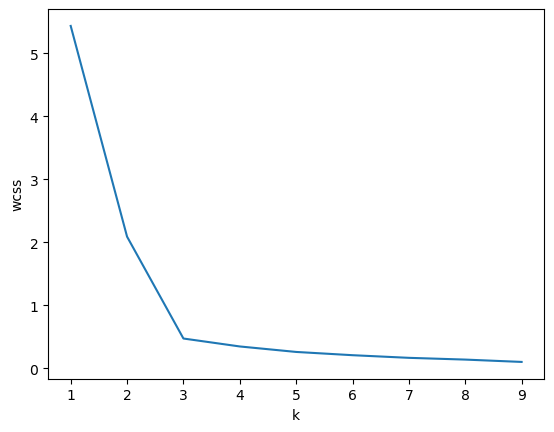

In [73]:
plt.plot(k_rng,sse)
plt.xlabel("k")
plt.ylabel("wcss")